# Project 2
## By: Brennen Green

### Prerequisites

In [24]:
# Import Needed Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.image as mpimg
from PIL import Image

### Problem 1:
Problem 1: Following is the given numpy array return array of odd rows and even columns ( 10 points) 

In [25]:
# Declare Needed Data
array = np.array([[3, 6, 9, 12],
                 [15, 18, 21, 24],
                 [27, 30, 33, 36],
                 [39, 42, 45, 48],
                 [51, 54, 57, 60]])

In [26]:
# Process Data
# Goal: Two functions, one with even columns, one with odd rows
# Assuming: Typical 0-indexing (0, 1, 2, 3, ..., n) of n x n array

def get_odd_rows(arr):
    # Finds all odd rows using a list comprehension which gets all odd indices
    # using the shape of the array. Then uses the numpy array special indexing
    return arr[[i for i in range(arr.shape[0]) if i % 2 != 0], :]

def get_even_cols(arr):
    # Finds all even columns using a list comprehension which gets all even indices
    # using the shape of the array. Then uses the numpy array special indexing
    return arr[:, [i for i in range(arr.shape[1]) if i % 2 == 0]]

In [27]:
print("Odd Rows:\n", get_odd_rows(array))
print("Even Columns:\n", get_even_cols(array))

Odd Rows:
 [[15 18 21 24]
 [39 42 45 48]]
Even Columns:
 [[ 3  9]
 [15 21]
 [27 33]
 [39 45]
 [51 57]]


### Problem: 2
Problem 2: Sort the following array by the second row and first column (12 points) 

In [28]:
# Declare Needed Data
array = np.array([[34, 43, 73],
                  [82, 22, 12],
                  [53, 94, 66]])

In [29]:
# Sort the data as requested using np sort functionality
sorted_first_column = array[array[:, 0].argsort()]
sorted_second_row = array[:, array[1].argsort()]
print("Sorted first column: \n", sorted_first_column)
print("Sorted second row: \n", sorted_second_row)


Sorted first column: 
 [[34 43 73]
 [53 94 66]
 [82 22 12]]
Sorted second row: 
 [[73 43 34]
 [12 22 82]
 [66 94 53]]


###  Problem 3
Identify what’s the dimension of the product of two numpy arrays with following dimensions (hint: broadcasting)

A (4d): 8 x 1 x 6 x 1
| B (3d):     7 x 1 x 5
| A * B = 8 x 7 x 6 x 5 

A (3d): 15 x 3 x 5
| B (3d): 15 x 1 x 5
| A * B = 15 x 3 x 5

A (3d): 15 x 3 x 5
| B (2d):      3 x 1
| A * B = 15 x 3 x 5

A (2d): 5 x 4
| B (1d):     1
| A * B = 5 x 4

A (2d): 5 x 4
| B (1d):     4
| A * B = 5 x 4

A (3d): 15 x 3 x 5
| B (2d):      1 x 3
| A * B = Incompatible broadcast because axes 3 in A and axes 2 in B are not equal and neither is 1

### Problem 4
Plot the following signal in Matplotlib (𝑓B = 33 Hz, 𝑓1 = 3600 Hz, 𝑓2 = 420 Hz, 𝑓3 = 160 Hz, and 𝑓4 = 50 Hz)

In [30]:
# Define necessary variables from problem
f_B = 33
f_1 = 3600
f_2 = 420
f_3 = 160
f_4 = 50

# Define x_1, .. , x_4
def x_1(t):
    t_1 = np.mod(t,(1/f_B))
    v = np.exp(-400 * t_1)
    y = np.sin(2*np.pi*f_1*t)
    return v * y 

In [31]:
def x_2(t):
    r = np.sin(2*np.pi*f_2*t)
    return r

In [32]:
def x_3(t):
    r = 0.8 * np.sin(2*np.pi*f_3*t)
    return r

In [33]:
def x_4(t):
    r = np.sin(2*np.pi*f_4*t)
    return r

In [34]:
# Define the n_t and x_t functions
def n_t(t):
    n = len(t)
    r = 0.16 * np.random.randn(n, 1)
    r = np.reshape(r, -1)
    return r

def x_t(t):
    return x_1(t) + x_2(t) + x_3(t) + x_4(t) + n_t(t)

In [35]:
# Create an appropriate sample space using a linear space 
duration = 1
t = np.linspace(0,duration,10000*duration)

# Store the result
result = x_t(t)

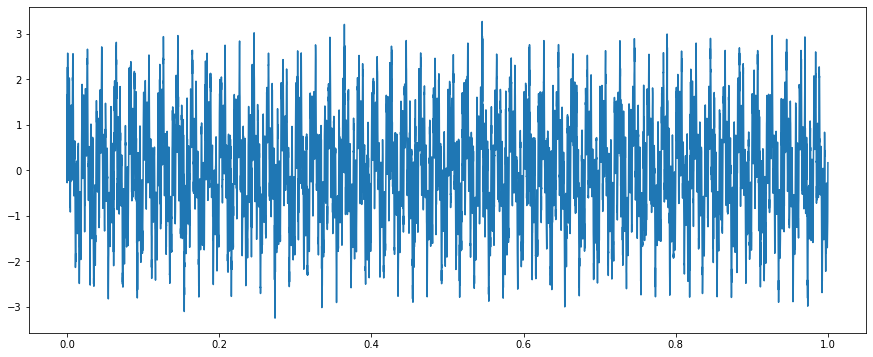

In [36]:
# Plot the signal
pyplot.figure(figsize=(15, 6)) # Draw a larger figure to avoid crowding
_ = pyplot.plot(t, result) # assign to _ to mute unnnecessary output

### Problem 5
Find a cat image online, use matplotlib to finish two functions ( 30 points): 

    1)Draw a histogram of the image pixel values (hint: use plt.hist() function)
    2)Plot downsized image (1/4 original image)
    3)Average the RGB layers (i.e. convert the image from 3-dimension to 2-dimension) and plot the image

Text(0.5, 1.0, 'Picture With Averaged RGB Values')

<Figure size 432x288 with 0 Axes>

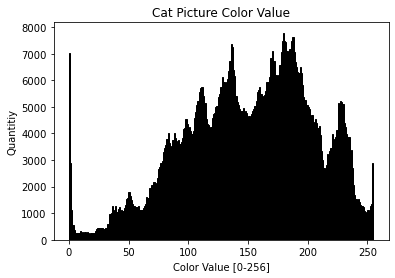

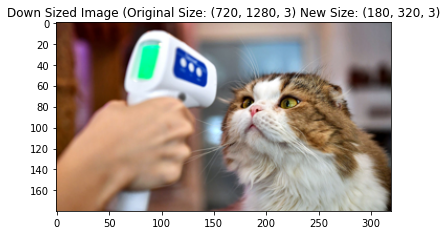

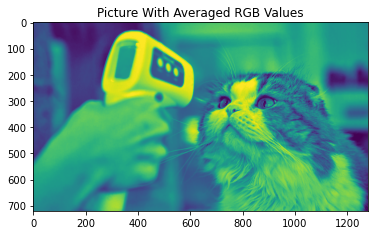

In [37]:
pyplot.figure() # Draw new figure
img = mpimg.imread("cat.jpg") # Open the cat pic
r_img = img[:, :, 0] # Create a new image with just the red color values since they are all similar 
avg_image = np.average(img, axis=2) # Create an averaged image based on the RGB axis 

pyplot.figure() # Draw new figure
pyplot.hist(r_img.ravel(), bins=256, ec='k', fc='k') # Flatten the image then distribute to a 256 bin histogram
pyplot.xlabel('Color Value [0-256]')
pyplot.ylabel('Quantitiy')
pyplot.title('Cat Picture Color Value')

resize_img = Image.open('cat.jpg') # Open a resizable image with PIL
resize_img = resize_img.resize((np.array(resize_img.size)/4).astype(int)) # Downscale the image by 4
pyplot.figure() # Draw new figure 
pyplot.imshow(resize_img) # Show the image on the plot 
pyplot.title('Down Sized Image (Original Size: ' + str(np.shape(img)) + ' New Size: ' + str(np.shape(resize_img)))


pyplot.figure() # Draw new figure
pyplot.imshow(avg_image) # Show the averaged image on the plot
pyplot.title('Picture With Averaged RGB Values')
